## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata,study_results,how = "inner" , on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = len(mouse_results_df["Mouse ID"].unique())
print(mice_number)
print()
print(mouse_results_df["Mouse ID"].count())


249

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_results_df[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"], keep='first')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = mouse_results_df[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"], keep='first')]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_results_df.drop(duplicate_mouse.index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(mouse_results_df["Mouse ID"].unique())
print(mice_number)
print()
print(mouse_results_df["Mouse ID"].count())

249

1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_df = mouse_results_df.groupby("Drug Regimen")

summary_statistics_regimen_df = pd.DataFrame({"Tumor volume Mean": regimen_df["Tumor Volume (mm3)"].mean(),
                                              "Tumor volume Median": regimen_df["Tumor Volume (mm3)"].median(),
                                              "Tumor volume Variance": regimen_df["Tumor Volume (mm3)"].var(),
                                              "Tumor volume Standard deviation": regimen_df["Tumor Volume (mm3)"].std(),
                                              "Tumor volume SEM": regimen_df["Tumor Volume (mm3)"].sem()})

summary_statistics_regimen_df

,Tumor volume Mean,Tumor volume Median,Tumor volume Variance,Tumor volume Standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics_two = mouse_results_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

summary_statistics_two

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


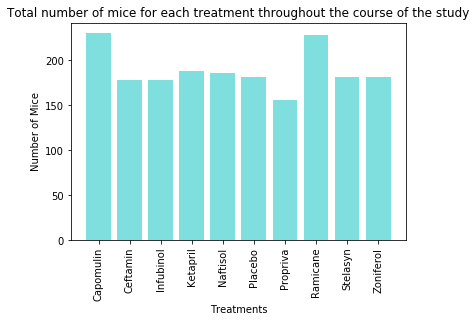

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_results_df
mouse_treatment = mouse_results_df.groupby("Drug Regimen")["Mouse ID"].count()
mouse_treatment.plot(kind="bar")

plt.title("Total number of mice for each treatment throughout the course of the study")
plt.show()
plt.tight_layout()

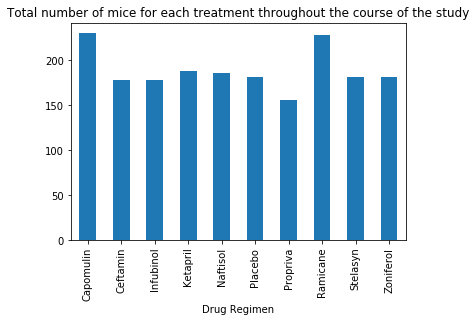

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

y_axis = mouse_results_df.groupby("Drug Regimen")["Mouse ID"].count()
treatments = mouse_results_df["Drug Regimen"].unique()
#treatments
x_axis = np.arange(len(treatments))

treatments.sort()
#treatments
tick_locations = [value for value in x_axis]
#tick_locations
plt.xticks(tick_locations, treatments, rotation="vertical")

plt.title("Total number of mice for each treatment throughout the course of the study")
plt.xlabel("Treatments")
plt.ylabel("Number of Mice")

plt.bar(x_axis, y_axis, color='c', alpha=0.5, align="center")
print(y_axis)

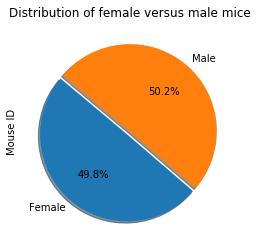

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_results_df.groupby(["Sex"])["Mouse ID"].nunique().plot(kind='pie', x='Sex distribution', explode = (0.05, 0.0), shadow = True, startangle=140, autopct="%1.1f%%")

plt.title("Distribution of female versus male mice")

plt.show()
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x194eae0dac8>,
 [Text(-0.7447483832873913, -0.8762704180735629, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.42094473837982993, -0.4952832797807094, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

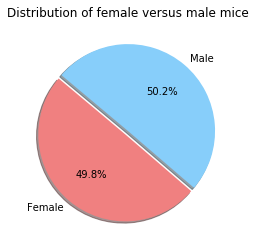

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#mouse_results_df.groupby(["Sex"]).agg({"Mouse ID": ['nunique']})
sex = ["Female", "Male"]
members = mouse_results_df.groupby(["Sex"])["Mouse ID"].nunique()
x_axis = np.arange(0, len(sex))
colors = ["lightcoral", "lightskyblue"]
explode = (0.05, 0.0)

plt.title("Distribution of female versus male mice")

plt.pie(members, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_results_df.groupby("Mouse ID").Timepoint.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_timepoint_df = pd.merge(greatest_timepoint,mouse_results_df,how = "inner" , left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'] )

mouse_timepoint_df =mouse_timepoint_df[mouse_timepoint_df["Drug Regimen"].isin (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) ]

mouse_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = mouse_results_df["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = mouse_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#mouse_timepoint_df.groupby("Drug Regimen")[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]

mouse_timepoint_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].sort_values(by="Drug Regimen", ascending=True)

    # add subset 
    
subset_mouse = mouse_timepoint_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]].sort_values(by="Drug Regimen", ascending=True)
    # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#subset_mouse.head(100)

outlier_tumor_volumes = subset_mouse.loc[(subset_mouse["Tumor Volume (mm3)"] < lower_bound) | (subset_mouse["Tumor Volume (mm3)"] > upper_bound)]

outlier_tumor_volumes
    

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Drug Regimen,Mouse ID,Tumor Volume (mm3)


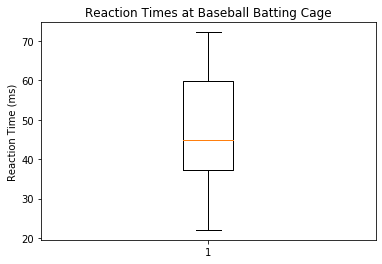

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

times = mouse_timepoint_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()


Line and Scatter Plots

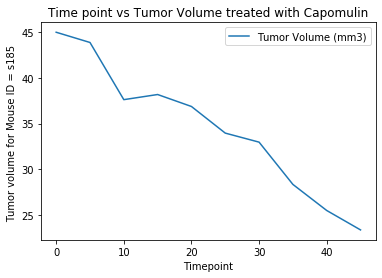

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_vs_volume_df =mouse_results_df[["Timepoint","Tumor Volume (mm3)"]].loc[(mouse_results_df["Drug Regimen"] == "Capomulin") & (mouse_results_df["Mouse ID"] == "s185")]

time_vs_volume_df.plot(x ="Timepoint", y="Tumor Volume (mm3)", kind = 'line')
plt.title("Time point vs Tumor Volume treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume for Mouse ID = s185 ")
plt.show()

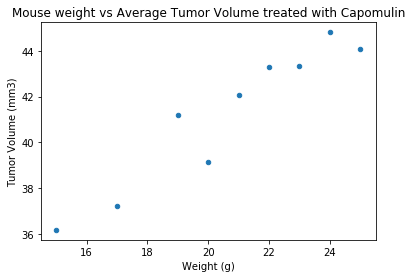

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_vs_volume_df =mouse_results_df[["Weight (g)","Tumor Volume (mm3)"]].loc[(mouse_results_df["Drug Regimen"] == "Capomulin")]
w_vs_v = weight_vs_volume_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
w_vs_v = w_vs_v.to_frame().reset_index()

w_vs_v.plot(x ="Weight (g)", y="Tumor Volume (mm3)", kind = 'scatter')
plt.title("Mouse weight vs Average Tumor Volume treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume is 0.95


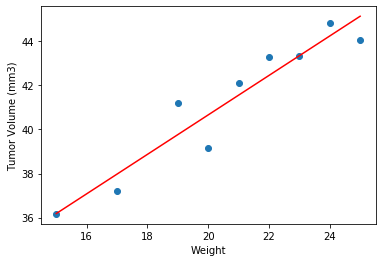

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = w_vs_v.iloc[:,0]
avgvolume = w_vs_v.iloc[:,1]
correlation = st.pearsonr(weight,avgvolume)
print(f"The correlation coefficient for mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgvolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avgvolume)
plt.plot(weight,regress_values,"r-")
#plt.annotate(line_eq,(0,0),fontsize=5,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

plt.show()